In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization
from tensorflow.keras.models import Model

In [4]:
CONFIGURATIONS = {
    'BATCH_SIZE':32,
    'IM_SIZE': 256,
    'LEARNING_RATE': 0.001,
    'N_EPOCH': 30,
    'N_DENSE_1': 1024,
    'N_DENSE_2': 128,
    'NUM_CLASSES':3
}

In [5]:
VGGNET = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(CONFIGURATIONS['IM_SIZE'], CONFIGURATIONS['IM_SIZE'],3)
)

In [6]:
 # filtering only convolutional layers
def is_conv(layer_name):
  if 'conv' in layer_name:
    return True
  else:
    return False

In [7]:
feature_maps = [layer.output for layer in VGGNET.layers[1:] if is_conv(layer.name)]

feature_map_model = Model(
    inputs = VGGNET.input,
    outputs = feature_maps
)

In [8]:
import cv2

In [9]:
test_image = cv2.imread('/content/drive/MyDrive/Data_Science/Projects/Computer_Vision/Human-Emotion-Detection/Emotions Dataset/test/happy/111073.jpg')
test_image = cv2.resize(test_image, (CONFIGURATIONS['IM_SIZE'],CONFIGURATIONS['IM_SIZE']))

im = tf.constant(test_image, dtype=tf.float32)
im = tf.expand_dims(im, axis=0)

In [10]:
f_maps = feature_map_model.predict(im)

1/1 [==============================] - 1s 1s/step


In [11]:
len(f_maps) # 13 convolutional layers

13

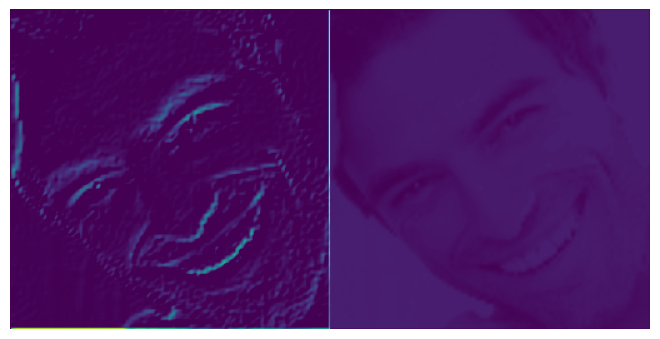

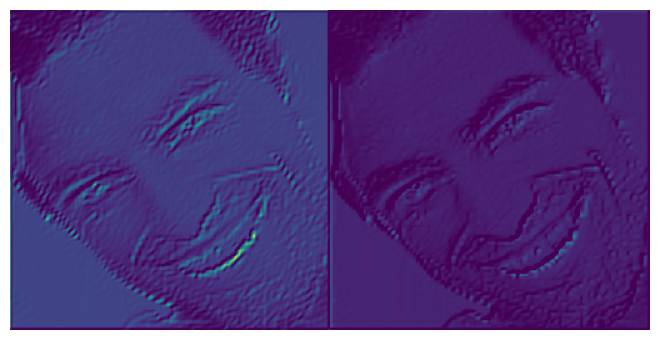

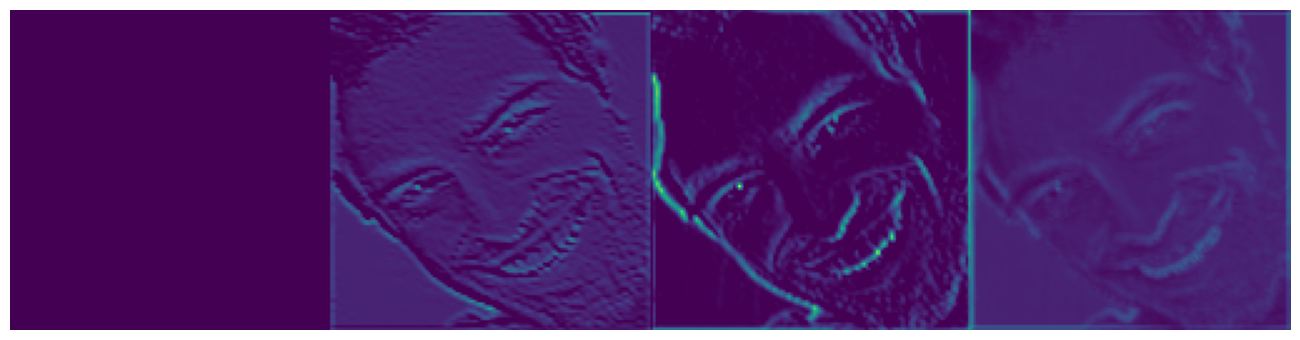

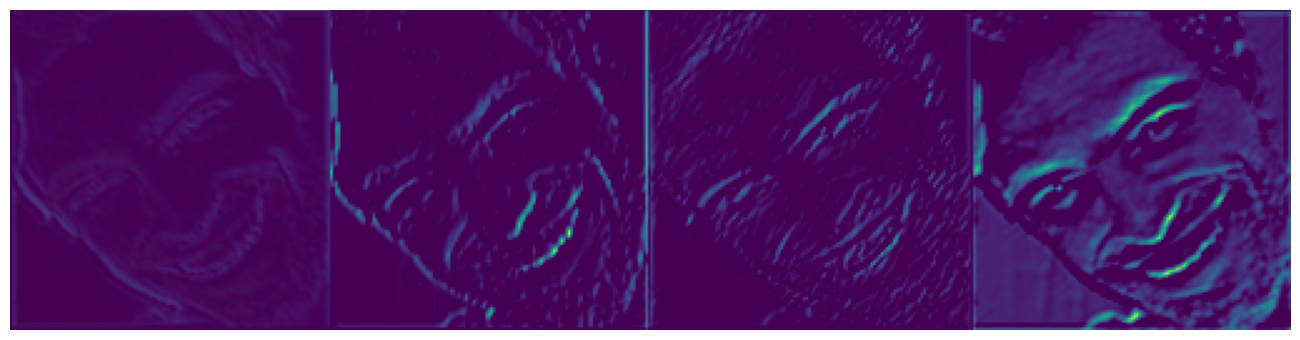

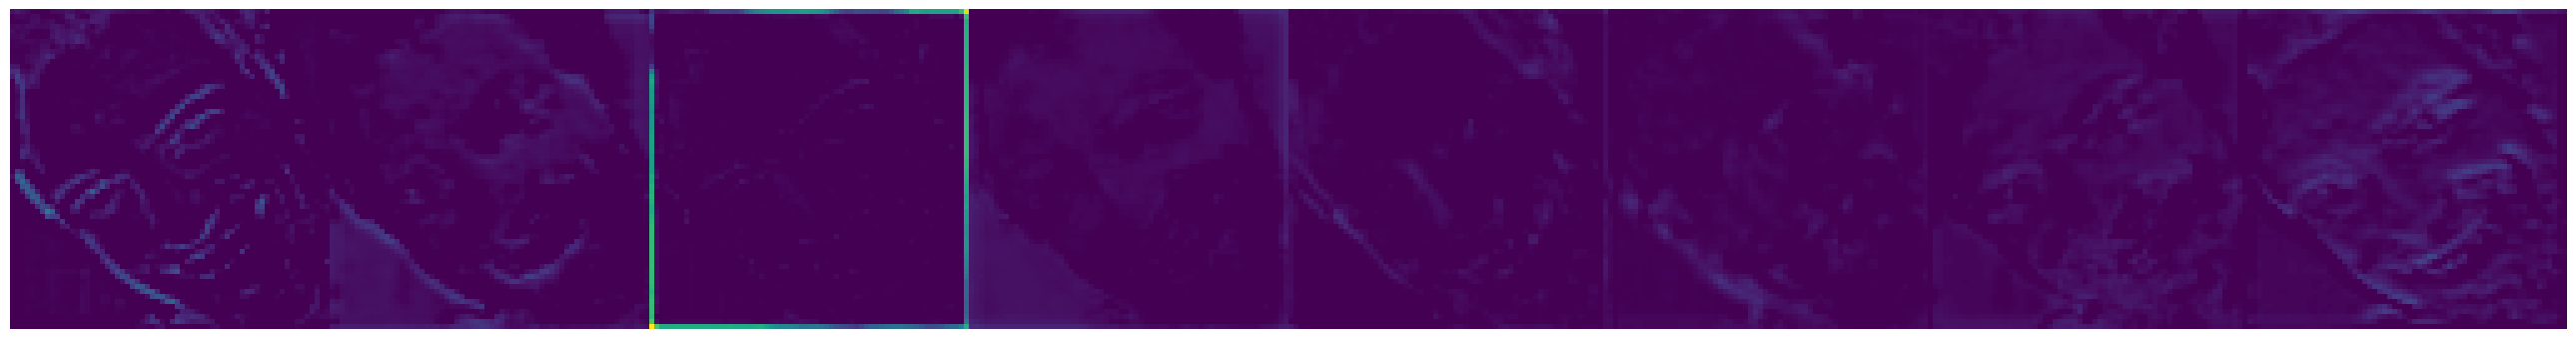

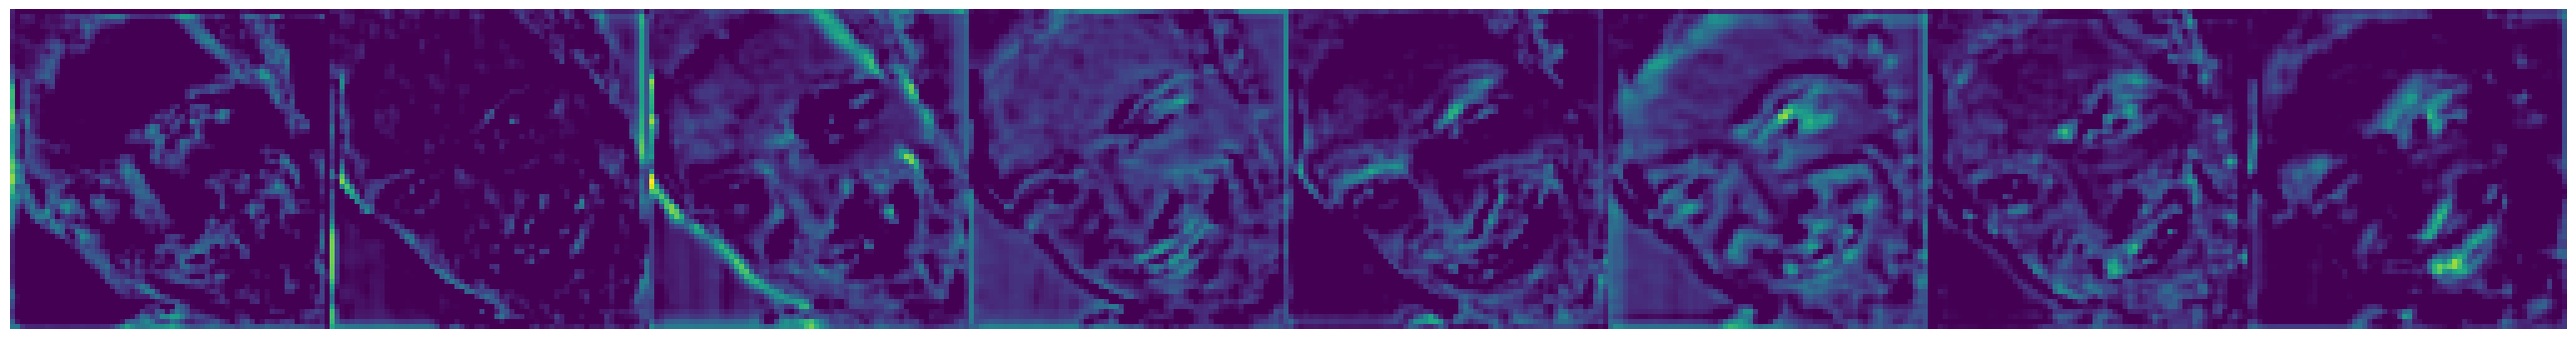

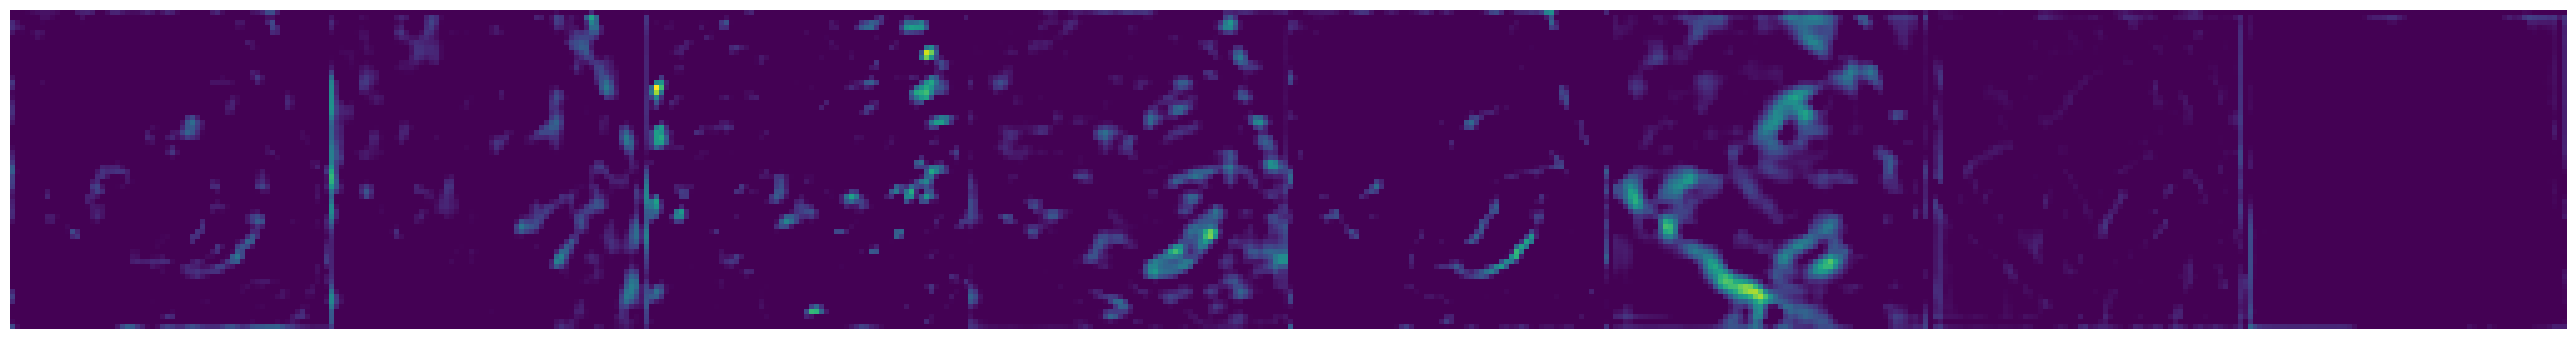

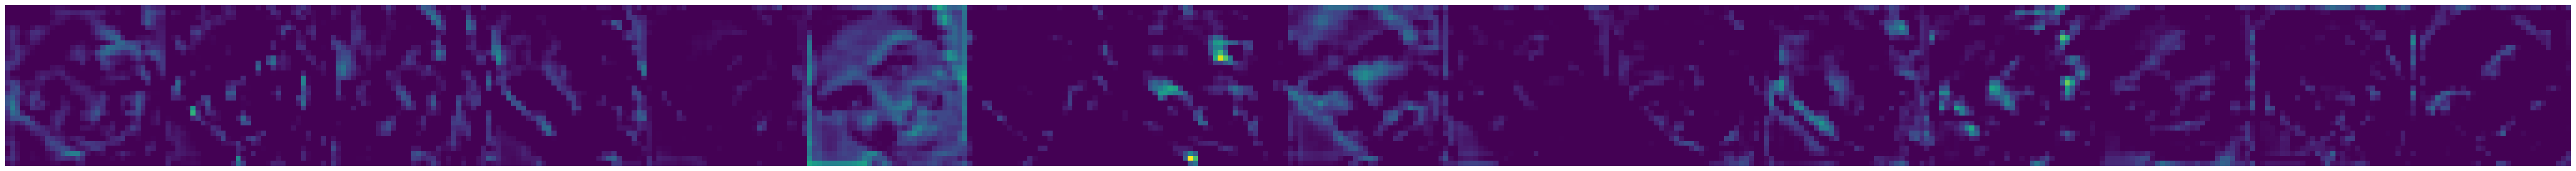

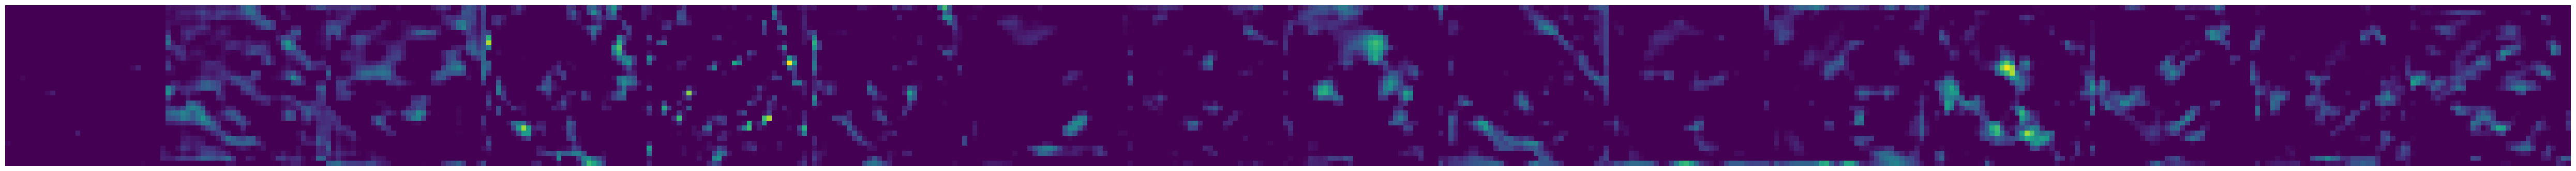

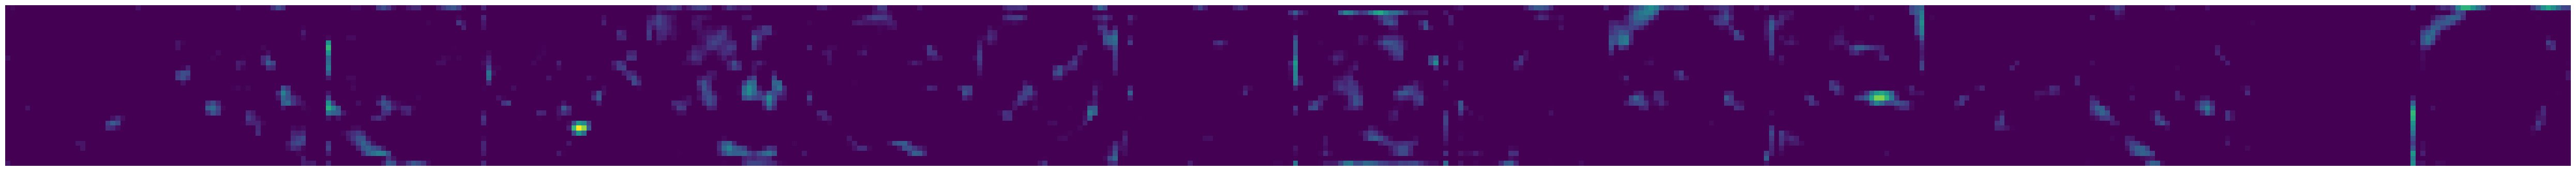

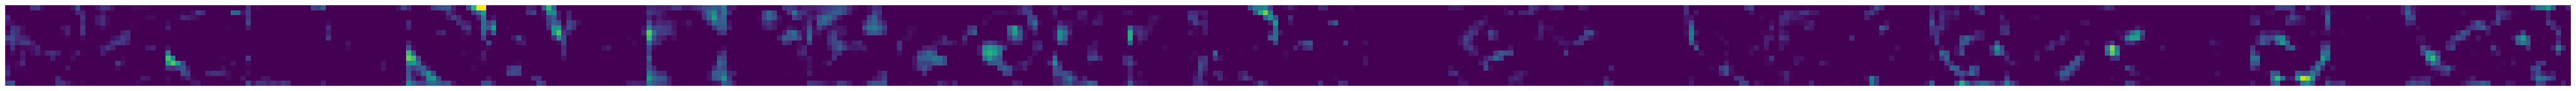

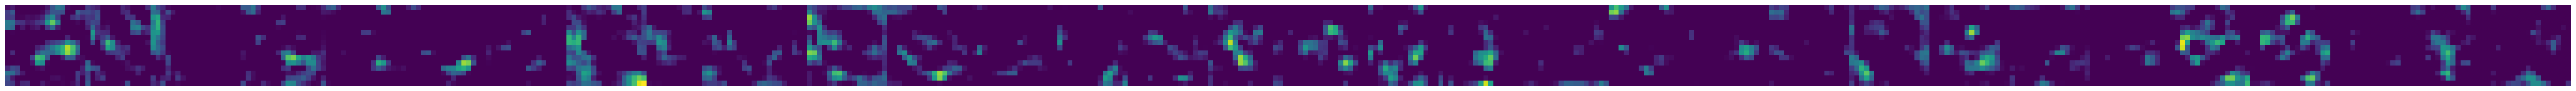

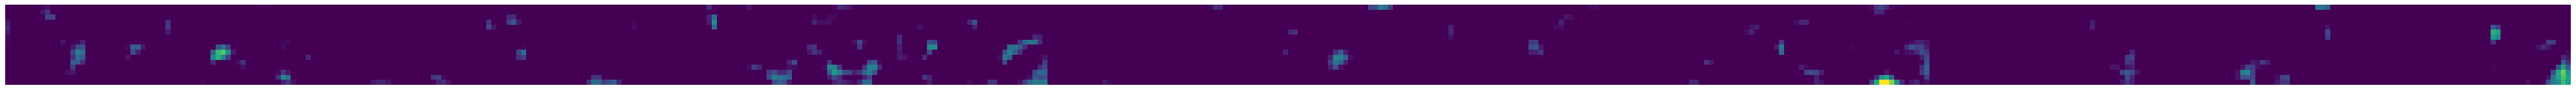

In [17]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(0, len(f_maps)):
  plt.figure(figsize =(64, 64))
  f_size = f_maps[i].shape[1]
  n_channels = f_maps[i].shape[3]
  joint_maps = np.ones((f_size, f_size * n_channels))

  axs = plt.subplot(len(f_maps), 1, i+1)

  for j in range(n_channels):
    joint_maps[:, f_size*j:f_size*(j+1)] = f_maps[i][..., j]

  plt.imshow(joint_maps[:, 0:512])
  plt.axis('off')